In [33]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import random
from ipywidgets import interact, interactive, IntSlider, ToggleButtons, fixed
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

In [22]:
TRAIN_PATH = "/data/users/6370327221/dataset/MRI-Brain-tumor-cls/Training/"
TEST_PATH = "/data/users/6370327221/dataset/MRI-Brain-tumor-cls/Testing/"

In [23]:
train_imgs = glob(TRAIN_PATH + '**/*.jpg')
test_imgs = glob(TEST_PATH + '**/*.jpg')

In [25]:
def make_overall_df():
    subsets = []
    paths = []
    tumor_types = []
    for path in (train_imgs + test_imgs):
        tumor_type = path.split('/')[-2]
        subset = path.split('/')[-3]
        paths.append(path)
        subsets.append(subset)
        tumor_types.append(tumor_type)
    return pd.DataFrame(list(zip(paths, subsets, tumor_types)), columns=['file path', 'split', 'tumor types'])

In [26]:
df = make_overall_df()
df

,file path,split,tumor types
0,/data/users/6370327221/dataset/MRI-Brain-tumor...,Training,meningioma_tumor
1,/data/users/6370327221/dataset/MRI-Brain-tumor...,Training,meningioma_tumor
2,/data/users/6370327221/dataset/MRI-Brain-tumor...,Training,meningioma_tumor
3,/data/users/6370327221/dataset/MRI-Brain-tumor...,Training,meningioma_tumor
4,/data/users/6370327221/dataset/MRI-Brain-tumor...,Training,meningioma_tumor
...,...,...,...
3259,/data/users/6370327221/dataset/MRI-Brain-tumor...,Testing,pituitary_tumor
3260,/data/users/6370327221/dataset/MRI-Brain-tumor...,Testing,pituitary_tumor
3261,/data/users/6370327221/dataset/MRI-Brain-tumor...,Testing,pituitary_tumor
3262,/data/users/6370327221/dataset/MRI-Brain-tumor...,Testing,pituitary_tumor


[Text(0, 0, '394'), Text(0, 0, '2870')]

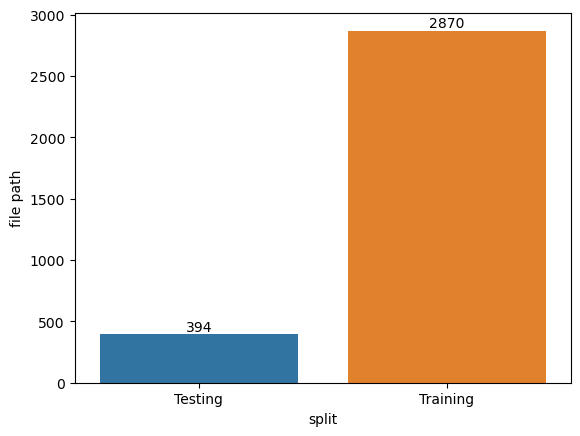

In [29]:
df_group = df.groupby(by='split').count()['file path'].to_frame().reset_index()
ax = sns.barplot(x="split", y="file path", data=df_group)
ax.bar_label(ax.containers[0])

[Text(0, 0, '937'), Text(0, 0, '926'), Text(0, 0, '901'), Text(0, 0, '500')]

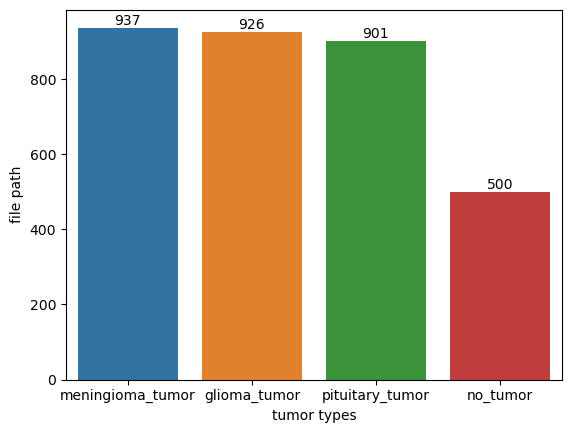

In [75]:
df_type = df.groupby(by='tumor types').count()['file path'].to_frame().reset_index().sort_values(by='file path', ascending=False)
ax = sns.barplot(x="tumor types", y="file path", data=df_type)
ax.bar_label(ax.containers[0])

In [91]:
def plot_samples_images(df, mode='train', n_samples=20):
    if n_samples % 4 != 0 :
        raise ValueError('n_samples should be divisible by 4')
        
    if mode == 'train':
        train_imgs = df[df['split']=='Training']['file path'].to_list()
        im_path = random.sample(train_imgs, n_samples)
    
    elif mode == 'test':
        test_imgs = df[df['split']=='Testing']['file path'].to_list()
        im_path = random.sample(test_imgs, n_samples)
    
    image_data = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) for path in im_path]
    image_data = [cv2.resize(im, (256,256), cv2.INTER_AREA) for im in image_data]
    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(n_samples // 4, 4),
                     axes_pad=0.3
                     )
    labels = [path.split('/')[-2] for path in im_path]

    for index, (ax, im) in enumerate(zip(grid, image_data)):
        ax.imshow(im, cmap='gray')
        ax.title.set_text(labels[index])

    plt.show()
    

In [92]:
def plot_by_tumor_types(df, tumor_type, n_samples=20):
    if n_samples % 4 != 0 :
        raise ValueError('n_samples should be divisible by 4')
    
    imgs = df[df['tumor types']==tumor_type]['file path'].to_list()
    im_path = random.sample(imgs, n_samples)
    
    image_data = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) for path in im_path]
    image_data = [cv2.resize(im, (256,256), cv2.INTER_AREA) for im in image_data]
    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(n_samples // 4, 4),
                     axes_pad=0.3
                     )
    labels = [path.split('/')[-2] for path in im_path]

    for index, (ax, im) in enumerate(zip(grid, image_data)):
        ax.imshow(im, cmap='gray')
        ax.title.set_text(labels[index])

    plt.show()
    

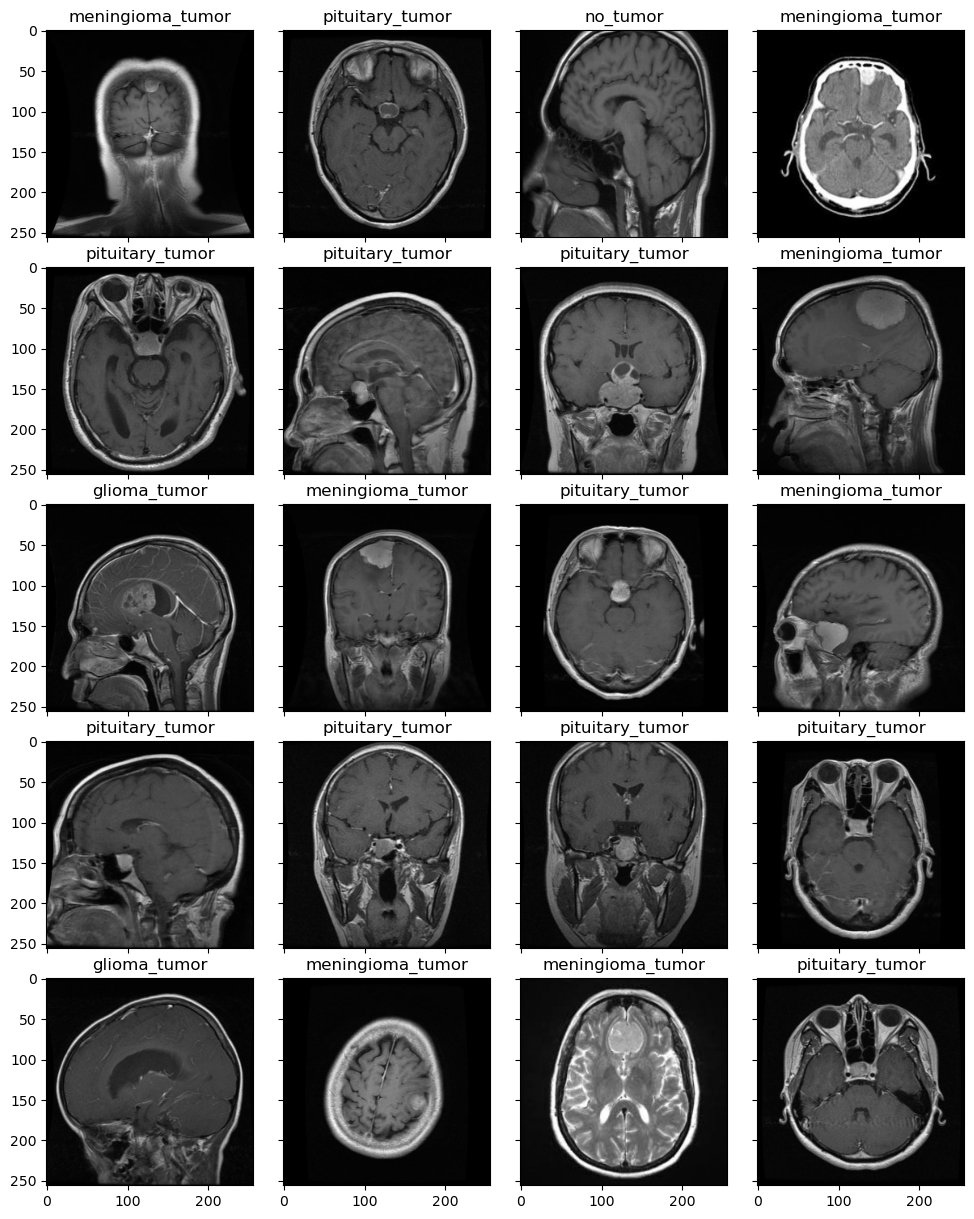

In [93]:
plot_samples_images(df)

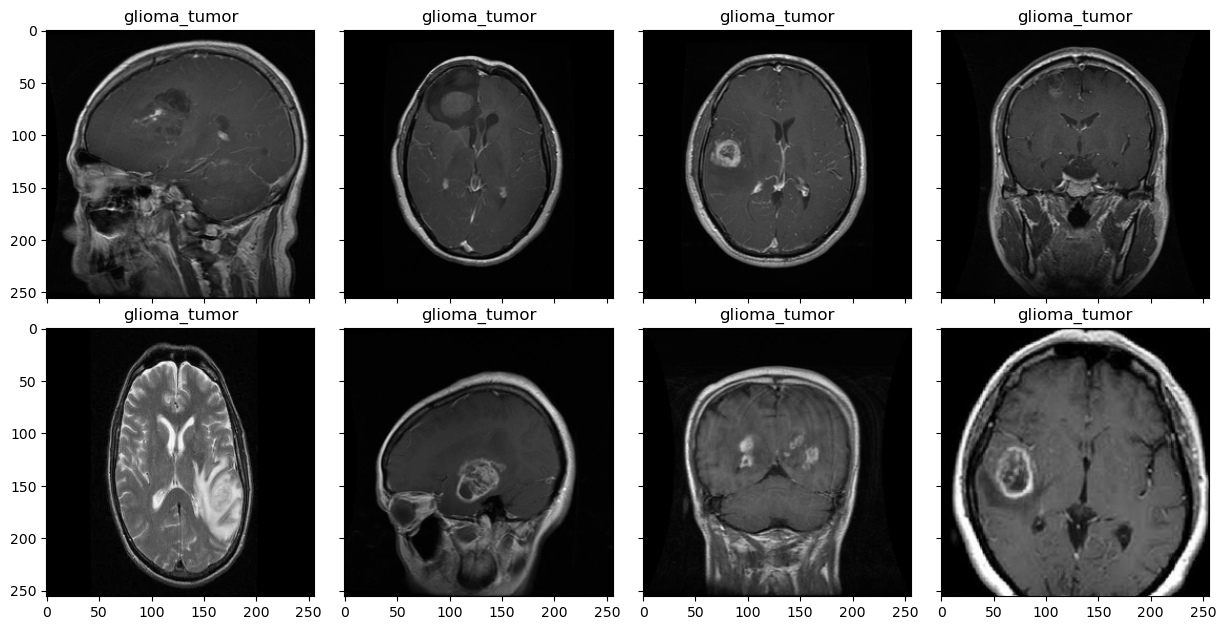

In [94]:
plot_by_tumor_types(df, 'glioma_tumor', 8)

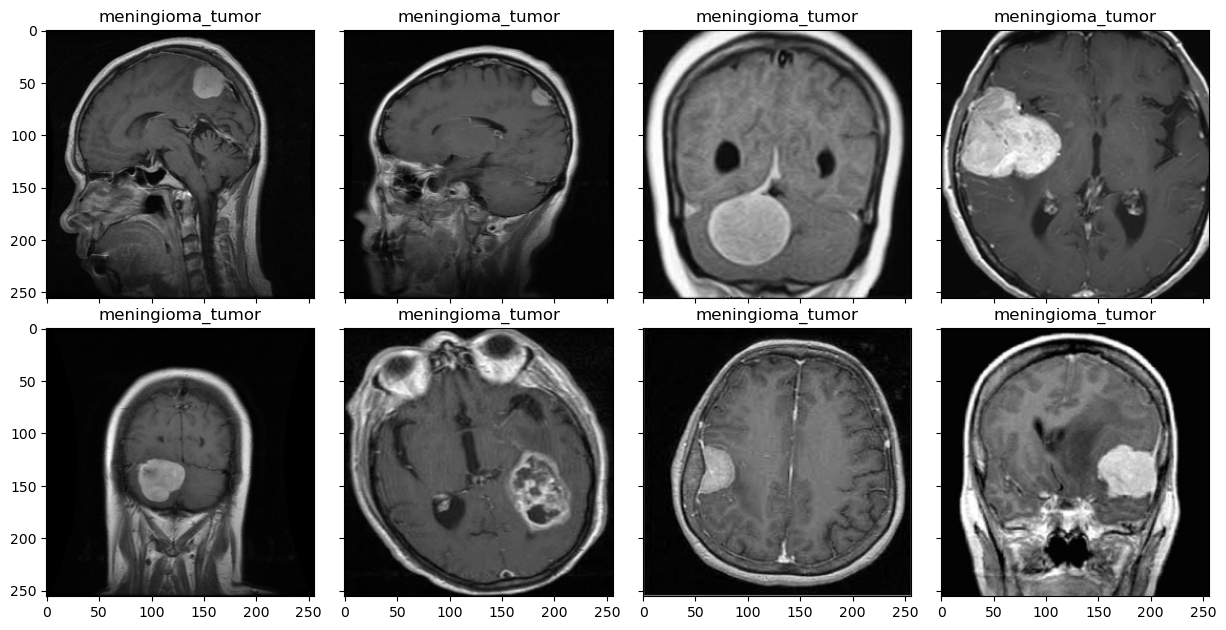

In [95]:
plot_by_tumor_types(df, 'meningioma_tumor', 8)

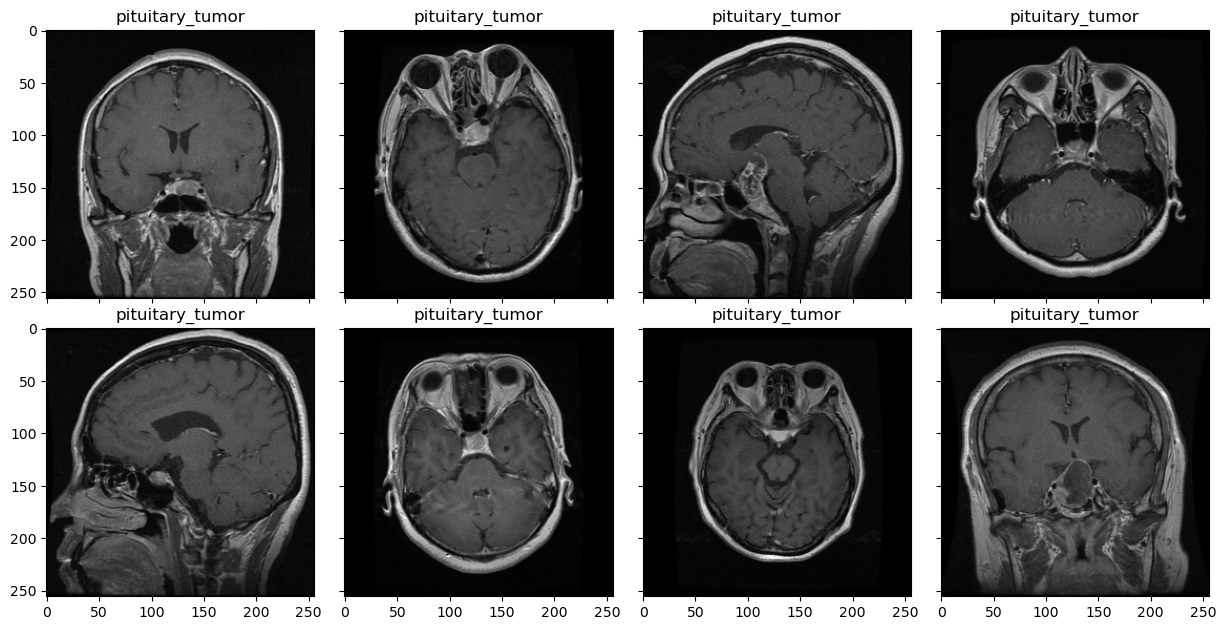

In [96]:
plot_by_tumor_types(df, 'pituitary_tumor', 8)